In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import bokeh
import seaborn as sns
warnings.filterwarnings("ignore")

c:\Users\siasr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = pd.read_csv('kdrama.csv')

In [7]:
df

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"Jun Ji-hyun, Lee Min-ho",17.600,"Fantasy,Romance,Comedy","Jin Hyuk, Park Seon-Ho",Park Ji-eun,2016,21,SBS
1,The Heirs,7.5,"Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park H...",16.700,"Romance, Drama, Teen","Kang Shin-hyo, Boo Sung-chul",Kim Eun-sook,2013,20,SBS
2,The King: Eternal Monarch,8.3,"Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyung...",7.700,"Romance, Fantasy, Drama","Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won",Kim Eun-sook,2020,16,SBS
3,Boys over Flowers,7.9,"Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim Bu...",25.700,"Romance, Comedy, Drama",Jeon Ki-sang,Yoon Ji-ryun,2009,25,KBS
4,Guardian: the lonely and the great god,8.6,"Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-na...",12.810,"Fantasy, Romance, Drama","Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho",Kim Eun-sook,2016,18,TvN
...,...,...,...,...,...,...,...,...,...,...
187,Big Mouth,8.0,"Lee Jong-suk, Im Yoon-ah, Kim Joo-hun",10.000,"Legal, Crime","Oh Chung-hwan, Bae Hyun-jin",Kim Ho-jun,2022,16,MBC
188,Good job,7.7,"Jung Il-woo, Kwon Yu-ri",2.500,"Mystery, Fantasy, Romance","Kang Min-gu, Kim Seong-jin","Kim Jeong-ae, Kwon Hee-kyung",2022,12,ENA
189,If you wish upon me,8.3,"Ji Chang-wook, Sung Dong-il, Choi Soo-young",2.300,"Slice-of-life, Drama",Kim Yong-wan,Jo Ryeong-soo,2022,16,KBS
190,100 days my prince,7.7,"Doh Kyung-soo, Nam Ji-hyun, Jo Sung-ha, Jo Han...",9.010,"Historical, Romance, Comedy","Lee Jong-jae, Nam Sung-woo",No Ji-sul,2018,16,TvN


In [8]:
def formatting(lst):
    for col in lst:
        for i in range(df.shape[0]):
            df[col][i] = df[col][i].split(',')

        for i in range(df.shape[0]):
            for j in range(len(df[col][i])):
                df[col][i][j] = df[col][i][j].lstrip()
        
    

In [9]:
format_col = ['Actors','Genre','Director','Writer']

Genre List

In [10]:
g_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Genre'][i])):
        g_list.append(df['Genre'][i][j])
Genre_list = list(set(g_list))

Networked List

In [11]:
Network_list = df['Network'].unique().tolist()

Actors List

In [12]:
a_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Actors'][i])):
        a_list.append(df['Actors'][i][j])
Actors_list = list(set(a_list))

Directors List

In [13]:
d_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Director'][i])):
        d_list.append(df['Director'][i][j])
Directors_list = list(set(d_list))

Writers List

In [14]:
w_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Writer'][i])):
        w_list.append(df['Writer'][i][j])
Writers_list = list(set(w_list))

Drama List

In [15]:
dr_list = []
for i in range(df.shape[0]):
    dr_list.append(df['Drama Name'][i])
Drama_List = dr_list

Networking Companies

In [16]:
network = df.copy()

In [17]:
a = network.groupby(by="Network").sum()

Text(0, 0.5, 'Popularity')

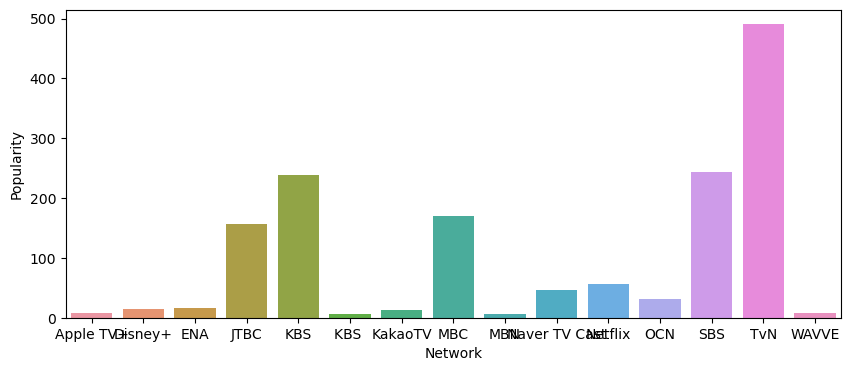

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x=a.index,y='Rating(Out of 10)',data=a)
plt.ylabel("Popularity")

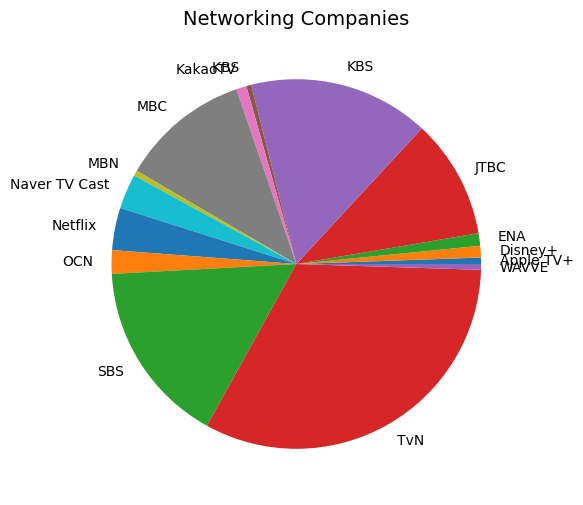

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
labels = a.index.tolist()
plt.pie(x=a['Rating(Out of 10)'].tolist(), labels=labels, pctdistance=0.5)
plt.title("Networking Companies", fontsize=14);

In [20]:

d = dict()

In [21]:
def genre_dictionary(com_list):
    dictionary_list = []
    for c in com_list:
        a = network.loc[:,('Genre','Network')]
        b = a[a['Network'] == c]
        d = dict((g,0) for g in Genre_list)
        for i in (b.index.to_list()):
            for j in range(len(b['Genre'][i])):
                for k in Genre_list:
                    if b['Genre'][i][j] == k:
                        d[k] +=1
        dictionary_list.append(d)
        
    return dictionary_list


In [22]:
dic = genre_dictionary(Network_list)


In [23]:
for i,j in zip(Network_list,dic):
    d[i] = j

In [24]:
#Piechart
def network_piechart(nw):
    d = netdata[netdata.index == str(nw)]
    plt.figure(figsize=(9,9))
    net_list = []
    for i in range(1):
        for j in range(d.shape[1]):
            if d.iloc[i,j] == 0:
                pass
            else:
                net_list.append(d.columns[j])
    Genre = net_list


    Value = list(filter(lambda a: a != 0,d.iloc[0,:].tolist()))


    # Pie Chart
    plt.pie(Value, labels=Genre,
            autopct='%1.1f%%', pctdistance=0.9)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Adding Title of chart
    plt.title(nw)

    # Displaing Chart
    plt.show()

Actors

In [27]:
actors = df.copy()
actors

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"Jun Ji-hyun, Lee Min-ho",17.600,"Fantasy,Romance,Comedy","Jin Hyuk, Park Seon-Ho",Park Ji-eun,2016,21,SBS
1,The Heirs,7.5,"Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park H...",16.700,"Romance, Drama, Teen","Kang Shin-hyo, Boo Sung-chul",Kim Eun-sook,2013,20,SBS
2,The King: Eternal Monarch,8.3,"Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyung...",7.700,"Romance, Fantasy, Drama","Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won",Kim Eun-sook,2020,16,SBS
3,Boys over Flowers,7.9,"Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim Bu...",25.700,"Romance, Comedy, Drama",Jeon Ki-sang,Yoon Ji-ryun,2009,25,KBS
4,Guardian: the lonely and the great god,8.6,"Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-na...",12.810,"Fantasy, Romance, Drama","Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho",Kim Eun-sook,2016,18,TvN
...,...,...,...,...,...,...,...,...,...,...
187,Big Mouth,8.0,"Lee Jong-suk, Im Yoon-ah, Kim Joo-hun",10.000,"Legal, Crime","Oh Chung-hwan, Bae Hyun-jin",Kim Ho-jun,2022,16,MBC
188,Good job,7.7,"Jung Il-woo, Kwon Yu-ri",2.500,"Mystery, Fantasy, Romance","Kang Min-gu, Kim Seong-jin","Kim Jeong-ae, Kwon Hee-kyung",2022,12,ENA
189,If you wish upon me,8.3,"Ji Chang-wook, Sung Dong-il, Choi Soo-young",2.300,"Slice-of-life, Drama",Kim Yong-wan,Jo Ryeong-soo,2022,16,KBS
190,100 days my prince,7.7,"Doh Kyung-soo, Nam Ji-hyun, Jo Sung-ha, Jo Han...",9.010,"Historical, Romance, Comedy","Lee Jong-jae, Nam Sung-woo",No Ji-sul,2018,16,TvN


In [28]:
A = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network','Viewship Rate')]

In [29]:
drama_list = []
for c in Drama_List:
    a = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network')]
    b = a[a['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)

In [30]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

Healer
The K2
Suspicious Partner
Melting me softly
The sound of magic
If you wish upon me 


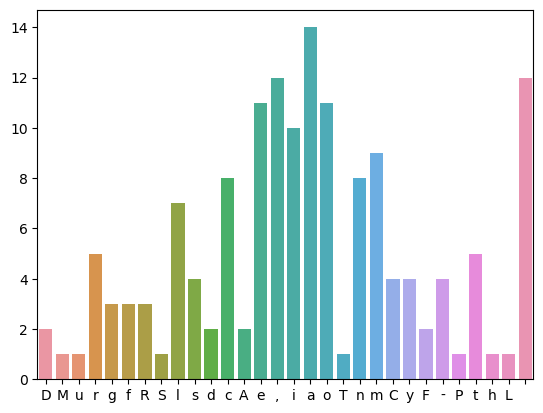

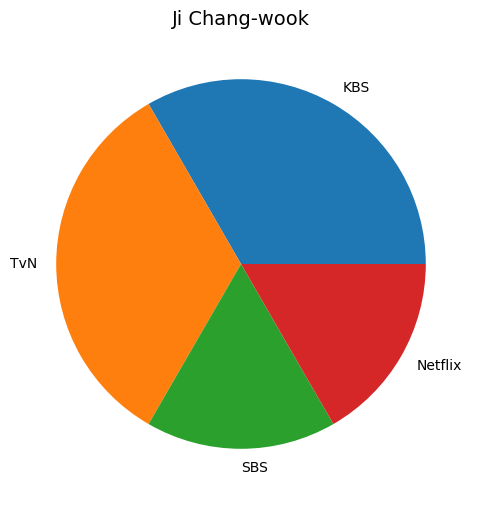

In [31]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
actordata = pd.merge(A,dramadata,on='Drama Name')
actdata = pd.DataFrame(columns = actordata.columns.tolist())
index_ = []
user = input("Enter the actor name:")
for i in range(actordata.shape[0]):
    if user in actordata['Actors'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
        print(actordata['Drama Name'][i])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,6:]

for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
#sns.barplot(z.columns.tolist(),z.sum())
sns.barplot(x=z.columns.tolist(),y=z.sum())
pie, ax = plt.subplots(figsize=[10,6])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
plt.title(user, fontsize=14);

In [32]:
result

,Drama Name,Rating(Out of 10),Actors,Genre,Network,Viewship Rate,B,H,W,D,...,k,y,F,-,P,t,h,L,w,
23,Healer,8.5,"Ji Chang-wook, Park Min-young, Too Ji-tae","Action, Thriller, Romance",KBS,7.60,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2
24,The K2,7.8,"Ji Chang-wook, Im Yoon-ah, Song Yoon-ah, Jo Su...","Action, Drama, Politics",TvN,4.86,0,0,0,1,...,0,0,0,0,1,2,0,0,0,2
25,Suspicious Partner,7.9,"Ji Chang-wook, Nam Ji-hyun, Choi Tae-joon, Kwo...","Legal, Crime, Romance, Comedy",SBS,7.20,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
157,Melting me softly,7.0,"Ji Chang-wook, Won Jin-ah, Yoon Se-ah","Romance, Comedy, Fantasy",TvN,2.10,0,0,0,0,...,0,2,1,0,0,1,0,0,0,2
166,The sound of magic,7.8,"Ji Chang-wook, Choi Sung-eun, Hwang In-youp","Musical, Fantasy, Coming-of-age",Netflix,7.00,0,0,0,0,...,0,1,1,2,0,1,0,0,0,2
189,If you wish upon me,8.3,"Ji Chang-wook, Sung Dong-il, Choi Soo-young","Slice-of-life, Drama",KBS,2.30,0,0,0,1,...,0,0,0,2,0,0,0,0,0,1


In [33]:
index_ = []
act_ = []
for i in range(actordata.shape[0]):
    for j in Actors_list:
        if j in actordata['Actors'][i]:
            act_.append(j)
            index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
result['Actor Name'] = act_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Actors','Network'],axis=1)
result.groupby('Actor Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Actor Name,,
,1506.8,1404.14
",",1506.8,1404.14
-,1506.8,1404.14
n,1506.8,1404.14
o,1477.3,1372.74


Drama

In [38]:
Drama = df.copy()

In [39]:
drama_list = []
for c in Drama_List:
    b = Drama[Drama['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)

In [40]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [41]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Drama = pd.merge(Drama,dramadata,on='Drama Name')
Drama = Drama.drop(['Genre'],axis=1)

In [42]:
Drama

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Director,Writer,Year,No of Episodes,Network,B,...,k,y,F,-,P,t,h,L,w,
0,Legend of the Blue Sea,8.1,"Jun Ji-hyun, Lee Min-ho",17.600,"Jin Hyuk, Park Seon-Ho",Park Ji-eun,2016,21,SBS,0,...,0,2,1,0,0,1,0,0,0,0
1,The Heirs,7.5,"Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park H...",16.700,"Kang Shin-hyo, Boo Sung-chul",Kim Eun-sook,2013,20,SBS,0,...,0,0,0,0,0,0,0,0,0,2
2,The King: Eternal Monarch,8.3,"Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyung...",7.700,"Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won",Kim Eun-sook,2020,16,SBS,0,...,0,1,1,0,0,1,0,0,0,2
3,Boys over Flowers,7.9,"Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim Bu...",25.700,Jeon Ki-sang,Yoon Ji-ryun,2009,25,KBS,0,...,0,1,0,0,0,0,0,0,0,2
4,Guardian: the lonely and the great god,8.6,"Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-na...",12.810,"Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho",Kim Eun-sook,2016,18,TvN,0,...,0,1,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Big Mouth,8.0,"Lee Jong-suk, Im Yoon-ah, Kim Joo-hun",10.000,"Oh Chung-hwan, Bae Hyun-jin",Kim Ho-jun,2022,16,MBC,0,...,0,0,0,0,0,0,0,1,0,2
188,Good job,7.7,"Jung Il-woo, Kwon Yu-ri",2.500,"Kang Min-gu, Kim Seong-jin","Kim Jeong-ae, Kwon Hee-kyung",2022,12,ENA,0,...,0,3,1,0,0,2,0,0,0,3
189,If you wish upon me,8.3,"Ji Chang-wook, Sung Dong-il, Choi Soo-young",2.300,Kim Yong-wan,Jo Ryeong-soo,2022,16,KBS,0,...,0,0,0,2,0,0,0,0,0,1
190,100 days my prince,7.7,"Doh Kyung-soo, Nam Ji-hyun, Jo Sung-ha, Jo Han...",9.010,"Lee Jong-jae, Nam Sung-woo",No Ji-sul,2018,16,TvN,0,...,0,1,0,0,0,1,0,0,0,3


<AxesSubplot:>

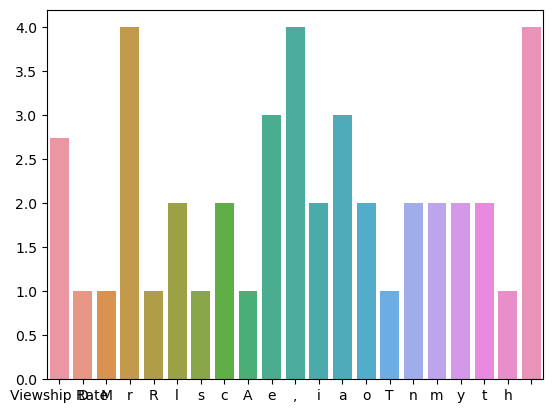

In [45]:
index_ = []
user = input("Enter the Drama name:")
for i in range(Drama.shape[0]):
    if user in Drama['Drama Name'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,5:]
for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1) 
 #sns.barplot(z.columns.tolist(),z.sum())
sns.barplot(x=z.columns.tolist(), y=z.sum())

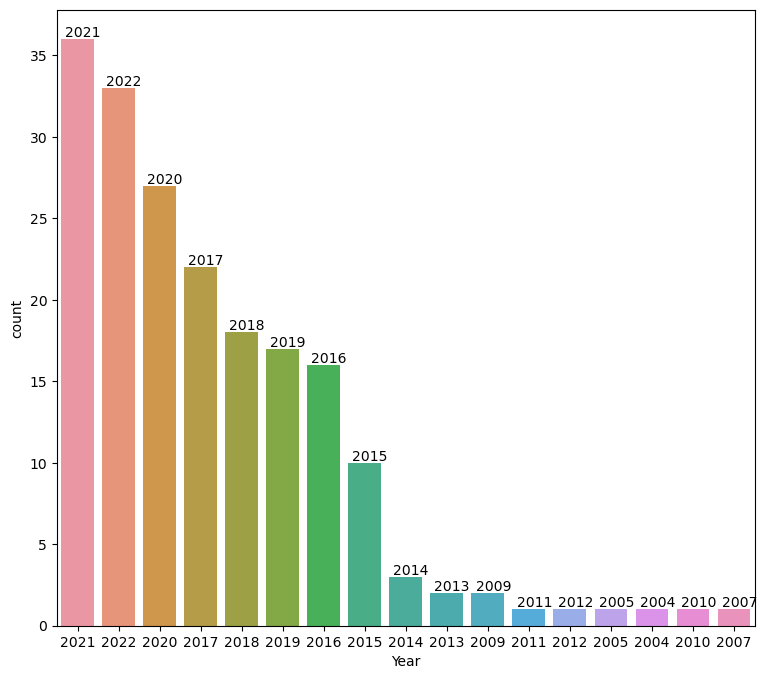

In [46]:
plt.figure(figsize=(9,8))
ax = sns.countplot(Drama["Year"], 
                   order = Drama["Year"].value_counts().index)

for p, label in zip(ax.patches, Drama["Year"].value_counts().index):
    ax.annotate(label, (p.get_x()+0.1, p.get_height()+0.15))

Recommended Top 5 Kdrama based on-

1. General

In [47]:
Drama.sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Director
53,Reply 1988,9.1,"Lee Hye-ri, Park Bo-gum, Go Kyung-pyo, Ryu Jun...",12.300,Shin Won-ho
151,Snowdrop,9.0,"Jung Hae-in, Jisoo, Yoo In-na, Jang Seung-jo, ...",2.738,Jo Hyun-tak
88,Mr.queen,8.9,"Shin Hye-sun, Kim Jung-hyun, Bae Jong-ok, Kim ...",12.580,Yoon Sung-sik
167,Tomorrow,8.9,"Kim Hee-sun, Rowoon, Lee Soo-hyuk, Yoon Ji-on",3.400,"Kim Tae-yoon, Sung Chi-wook"
102,Mr. Sunshine,8.8,"Lee Byung-hun, Kim Tae-ri, Yoo Yeon-seok, Kim ...",12.950,Lee Eung-bok


2.Year

In [49]:
year = int(input('Enter Year:'))
Drama[Drama['Year'] == year].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Director
167,Tomorrow,8.9,"Kim Hee-sun, Rowoon, Lee Soo-hyuk, Yoon Ji-on",3.400,"Kim Tae-yoon, Sung Chi-wook"
183,Extraordinary attorney Woo,8.8,"Park Eun-bin, Kang Tae-oh, Kang Ki-young",10.937,Yoo In-sik
159,Twenty Five Twenty One,8.7,"Kim Tae-ri, Nam Joo-hyuk, Bona, Choi Hyun-wook...",9.600,Jung Ji-hyun
184,Alchemy of soul,8.7,"Lee Jae-Wook, Jung So-min, Hwang Min-hyun, Go ...",7.500,Park Joon-hwa
171,Our Blues,8.6,"Lee Byung-hun, Shin Min-a, Cha Seung-won, Lee ...",9.953,Kim Kyu-tae


3.Genre

In [73]:
genre = input("Enter your Genre:")
Drama[Drama[genre] == 1].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

KeyError: 'Teen'

4.Number Of Episodes

In [56]:
epi = int(input("Enter your atmost number of episodes:"))
Drama[Drama['No of Episodes'] <= epi].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Director
151,Snowdrop,9.0,"Jung Hae-in, Jisoo, Yoo In-na, Jang Seung-jo, ...",2.738,Jo Hyun-tak
167,Tomorrow,8.9,"Kim Hee-sun, Rowoon, Lee Soo-hyuk, Yoon Ji-on",3.400,"Kim Tae-yoon, Sung Chi-wook"
155,Hospital Playlist 2,8.8,"Jo Jung-suk, Yoo Yeon-seok, Jung Kyung-ho, Kim...",12.000,Shin Won-ho
183,Extraordinary attorney Woo,8.8,"Park Eun-bin, Kang Tae-oh, Kang Ki-young",10.937,Yoo In-sik
14,It’s okay to not be okay,8.8,"Kim Soo-hyun, Seo Yea-ji, Oh Jung-se, Park Gyu...",5.420,Park Shin-woo


Director

In [57]:
Director = df.copy()
Director = Director.drop(['Actors','Writer','No of Episodes'],axis=1)

In [58]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [59]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Director = pd.merge(Director,dramadata,on='Drama Name')
Director = Director.drop(['Genre'],axis=1)

Healer
Angel’s last mission: Love
Dali and cocky prince

Genres that Director has worked with:
{'m', 'C', 'n', 'e', 's', ',', 'y', 'F', 'd', 'a', 't', 'h', 'T', 'c', 'o', 'R', 'A', ' '}


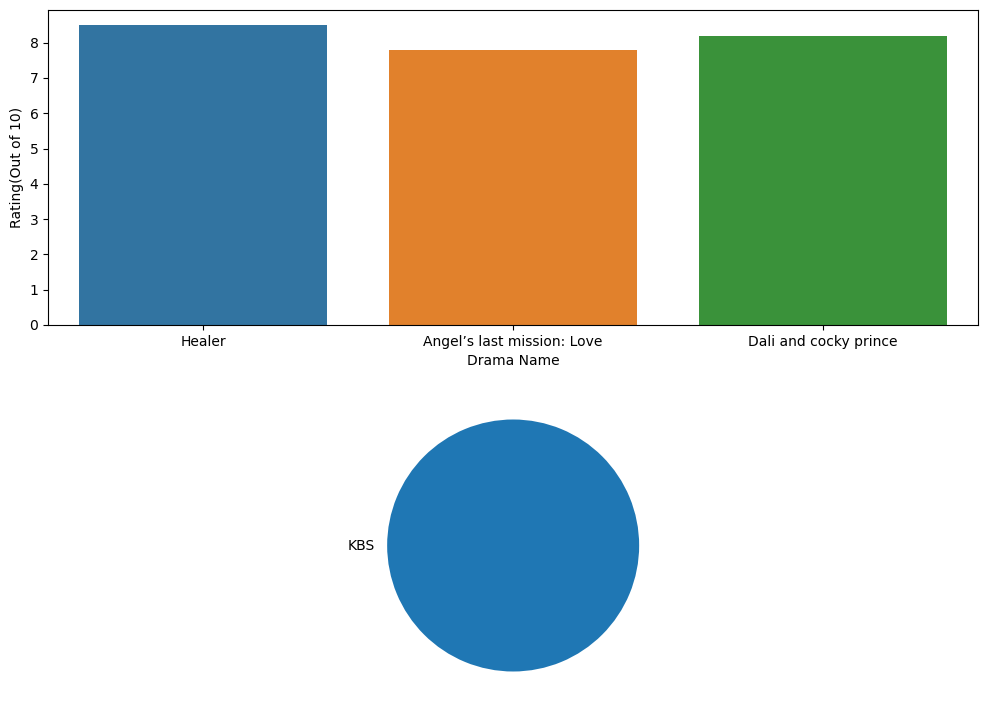

In [60]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Director name:")
for i in range(Director.shape[0]):
    if user in Director['Director'][i]:
        print(Director['Drama Name'][i])
        index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Director has worked with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)  

Top 5 Directors

In [61]:
index_ = []
dir_ = []
for i in range(Director.shape[0]):
    for j in Directors_list:
        if j in Director['Director'][i]:
            dir_.append(j)
            index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
result['Director Name'] = dir_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Director','Year','Network'],axis=1)
result.groupby('Director Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Director Name,,
,1506.8,1404.140
-,1475.8,1387.580
n,1443.6,1353.767
o,1243.3,1194.509
g,942.9,939.035


Writer

In [62]:
Writer = df.copy()
Writer = Writer.drop(['Actors','Director','No of Episodes'],axis=1)

In [63]:
drama_list = []
for c in Drama_List:
    b = Writer[Writer['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)

In [64]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [65]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Writer = pd.merge(Writer,dramadata,on='Drama Name')
Writer = Writer.drop(['Genre'],axis=1)

The Heirs
The King: Eternal Monarch
Guardian: the lonely and the great god
Descendants of the sun
Mr. Sunshine

Genres that Writer has wrote with:
{'H', 'D', 'r', 'R', 'l', 's', 'c', 'A', 'e', ',', 'i', 'a', 'o', 'T', 'n', 'm', 'y', 'F', 't', ' '}


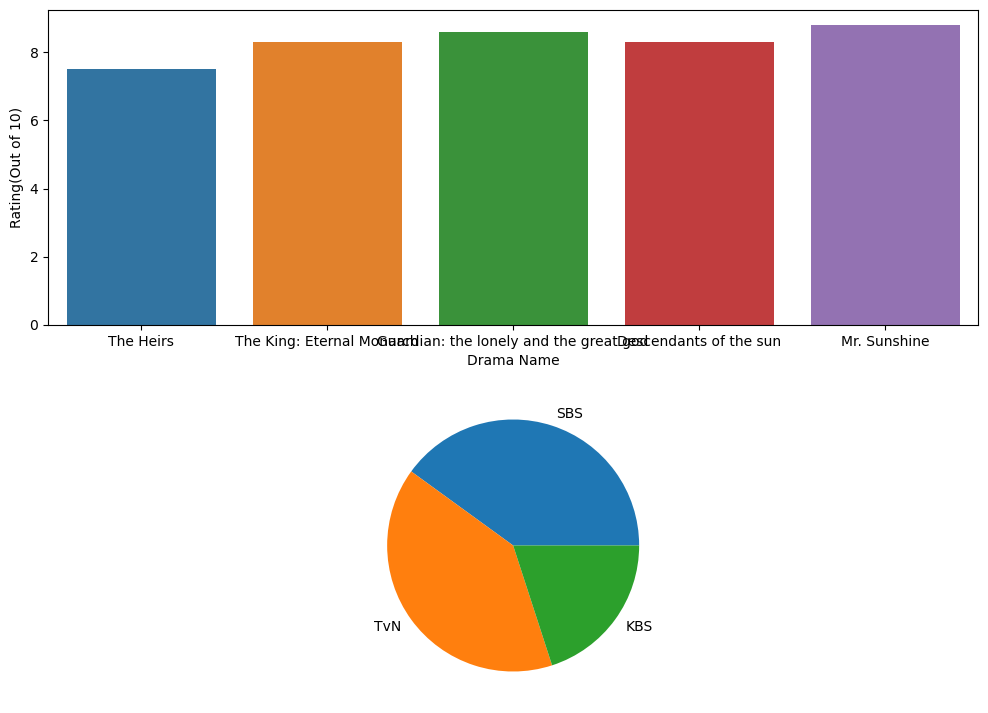

In [68]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Writer name:")
for i in range(Writer.shape[0]):
    if user in Writer['Writer'][i]:
        print(Writer['Drama Name'][i])
        index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Writer has wrote with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

Top 5 Writers

In [69]:
index_ = []
wri_ = []
for i in range(Writer.shape[0]):
    for j in Writers_list:
        if j in Writer['Writer'][i]:
            wri_.append(j)
            index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
result['Writer Name'] = wri_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Writer','Year','Network'],axis=1)
result.groupby('Writer Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Writer Name,,
,1506.8,1404.140
-,1404.1,1333.520
n,1311.7,1278.497
o,1108.4,1057.059
u,986.6,1041.037
